In [1]:
# load data

from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame = True)
data, target = housing.data, housing.target
target *= 100 # rescale the target in k$

In [2]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()

In [4]:
# to see the effect of sample size, we vary the proportion of the training set from 10% to 100%

import numpy as np

train_sizes = np.linspace(0.1, 1.0, num = 5, endpoint = True)
train_sizes

array([0.1  , 0.325, 0.55 , 0.775, 1.   ])

In [5]:
# we use a shufflesplit cross-validation to assess the predictive model

from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits = 30, test_size = 0.2)

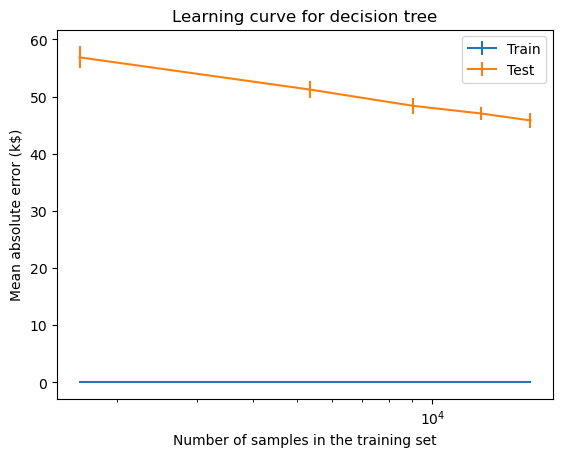

In [7]:
# compute learning curve for the decision tree

from sklearn.model_selection import LearningCurveDisplay

display = LearningCurveDisplay.from_estimator(
    regressor,
    data, 
    target,
    train_sizes = train_sizes,
    cv = cv,
    score_type = "both", # both train and test errors
    scoring = "neg_mean_absolute_error",
    negate_score = True, # to use when error metric starts with "neg_"
    score_name = "Mean absolute error (k$)",
    std_display_style = "errorbar",
    n_jobs = 2,
)
_ = display.ax_.set(xscale = "log", title = "Learning curve for decision tree")

From the training error being 0 k$ we can tell that this model is overfitting. From the testing error, we see that as we add more samples, the error decreases. We are looking for the point where this plateaus which indicates there is no more benefit to adding more samples and we would need a more complex model to reduce testing error further.